# Question: Is there a change in representation in advertisements over time?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Merged_Preprocessed_Mars2020_2021.csv')
df.head()

,Coder,Asset_Name,Brand,Lead_Country,Year_Produced,Year_Aired,Segment,Agency,Character_Name,Character_Description,...,Q29i_Clumsy,Q29j_Alone,Q30a_Comic_Relief,Q30b_Sidekick,Q30c_Mamma_Hen,Q30d_Nympho,Q31_Fat_to_Fit,Q32_Inspo_Porn,Q31_NOTES,Notes on Dwelling
0,Emma,Airwaves 2020 Intense Mint launch campaign video,Airwaves,NORTH ASIA,2020,2020,Confectionary,DDB,Man,at party,...,10,10,10,10,10,10,10,10,NaN,NaN
1,Pamela,BOOMER BICEP,BOOMER,India,2020,2020,Confectionary,DDB,Boomer Man,"Shirtless, dark hair, chewing gum",...,10,10,10,10,10,10,10,10,NaN,NaN
2,CEspinoza,BOOMER RAMAYAN,BOOMER,India,2020,2020,Confectionary,DDB,Older man watching TV,Older man watching TV,...,10,10,10,10,10,10,10,10,NaN,NaN
3,CEspinoza,BOOMER RAMAYAN,BOOMER,India,2020,2020,Confectionary,DDB,Boy watching TV,Boy watching TV,...,10,10,10,10,10,10,10,10,NaN,NaN
4,CAckel,BOOMER FISH BOWL,BOOMER,India,2020,2020,Confectionary,DDB,girl,sad,...,10,10,10,10,10,10,10,10,NaN,NaN


In [3]:
df.columns

Index(['Coder', 'Asset_Name', 'Brand', 'Lead_Country', 'Year_Produced',
       'Year_Aired', 'Segment', 'Agency', 'Character_Name',
       'Character_Description', 'Prominence', 'Animated', 'Animated Specify',
       'Gender', 'Trans', 'Race', 'Race Other/Specify', 'API', 'Skin tone',
       'Sexual Orientation', 'Queer', 'Age', 'Disabled', 'Disability Specify',
       'Body Type', 'Shopping', 'Driving', 'Cleaning', 'Cooking', 'Working',
       'Socializing', 'Nothing', 'EatingDrinking', 'Exercising',
       'Other Activity', 'Activity Other Specify', 'Kitchen', 'Office', 'Car',
       'Store', 'Outdoors', 'Living Room', 'Restaurant/Bar', 'Gym', 'Bedroom',
       'Bathroom', 'Sporting Event', 'Classroom', 'Setting Other',
       'Other Setting Specify', 'Revealing Clothing', 'Nudity',
       'Visually Objectified', 'Verbally Objectified', 'Intelligent', 'Funny',
       'Occupation', 'Leader', 'Authority', 'Q27a_Disordered_Eating',
       'Q27b_Selfy_injury', 'Q27c_NegativeTalk', 'Q27d_

To answer this question, we choose three different representations: age, sex, race/ethnicity to analyze.

We are going to plot bar charts to see the changes between different years.

## Age

In [4]:
# “Q2_Age”, “Q3_Sex”, and “Q7_Race_Ethnicity”.
uniq_age = np.sort(df['Age'].unique()).tolist()
# to get age distribution of Year_Aired = 2020
age_total = [[0, 0] for _ in range(len(uniq_age) + 1)]
# age_total[i][0] means the value counts of i-th answer of Q2_Age in Year_Aired = 2019
# age_total[i][1] means the value counts of i-th answer of Q2_Age in Year_Aired = 2020
# age_total[-1][0/1] means the total value counts of Q2_Age in Year_Aired = 2019/2020

year_2020_counts = df[df['Year_Aired'] == 2020]['Age'].value_counts()
year_2019_counts = df[df['Year_Aired'] == 2019]['Age'].value_counts()
sum_of_2019 = 0
sum_of_2020 = 0
for i in range(len(age_total) - 1):
    age_idx = uniq_age[i]
    if age_idx in year_2020_counts.index:
        age_total[i][1] = year_2020_counts[age_idx]
        sum_of_2020 += age_total[i][1]
    else:
        age_total[i][1] = 0
        
    if age_idx in year_2019_counts.index:
        age_total[i][0] = year_2019_counts[age_idx]
        sum_of_2019 += age_total[i][0]
    else:
        age_total[i][0] = 0
uniq_age.append('total')
age_total[-1][0] = sum_of_2019
age_total[-1][1] = sum_of_2020
# age_total

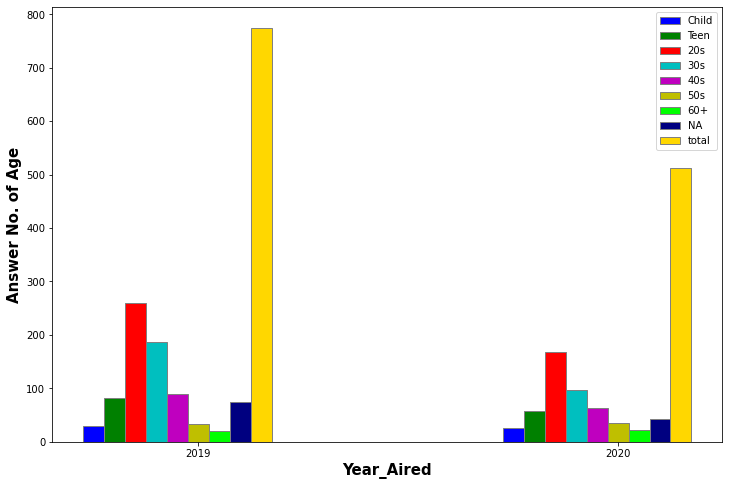

In [5]:
# plot
# set width of bar
barWidth = 0.05
fig = plt.subplots(figsize =(12, 8))
colors = ['b','g','r','c','m','y', 'lime', 'navy', 'gold', 'orange', 'coral', 'brown']

# Set position of bar on X axis
br = []
br_tmp = np.arange(len(age_total[0]))
br.append(br_tmp)

for i in range(1, len(age_total)):
    br_tmp = [x + barWidth for x in br[i-1]]
    br.append(br_tmp)

uniq_age_desc = [
    'Child',
    'Teen',
    '20s',
    '30s',
    '40s',
    '50s',
    '60+',
    'NA',
    'total'
]
# Make the plot
for i in range(len(br)):
    plt.bar(br[i], age_total[i], color =colors[i], width = barWidth, edgecolor ='grey', label = str(uniq_age_desc[i]))

# Adding Xticks
plt.xlabel('Year_Aired', fontweight ='bold', fontsize = 15)
plt.ylabel('Answer No. of Age', fontweight ='bold', fontsize = 15)
plt.xticks([r + 5 * barWidth for r in range(len(br[0]))],
        ['2019', '2020'])

plt.legend()
plt.show()

### Conclusion

From the bar chart above, we can see that the distribution of two answers are almost the same; both figure out that option on those who in their 20s, have the most people. But comparing to 2019, the total number of answers in 2020 decreased.

## Gender

In [6]:
# uniq_sex = np.sort(df['Q3_Sex'].unique()).tolist()
uniq_sex = [1,2,3,888,999]
uniq_sex_desc = ['Man','Woman','Non-binary','Can’t Tell','Not Applicable', 'total']
# to get age distribution of Year_Aired = 2020
sex_total = [[0, 0] for _ in range(len(uniq_sex) + 1)]
# sex_total[i][0] means the value counts of i-th answer of Q3_Sex in Year_Aired = 2019
# sex_total[i][1] means the value counts of i-th answer of Q3_Sex in Year_Aired = 2020
# sex_total[-1][0/1] means the total value counts of Q3_Sex in Year_Aired = 2019/2020

year_2020_counts = df[df['Year_Aired'] == 2020]['Gender'].value_counts()
year_2019_counts = df[df['Year_Aired'] == 2019]['Gender'].value_counts()
sum_of_2019 = 0
sum_of_2020 = 0
for i in range(len(sex_total) - 1):
    sex_idx = uniq_sex[i]
    if sex_idx in year_2020_counts.index:
        sex_total[i][1] = year_2020_counts[sex_idx]
        sum_of_2020 += sex_total[i][1]
    else:
        sex_total[i][1] = 0
        
    if sex_idx in year_2019_counts.index:
        sex_total[i][0] = year_2019_counts[sex_idx]
        sum_of_2019 += sex_total[i][0]
    else:
        sex_total[i][0] = 0
uniq_sex.append('total')
sex_total[-1][0] = sum_of_2019
sex_total[-1][1] = sum_of_2020
# sex_total

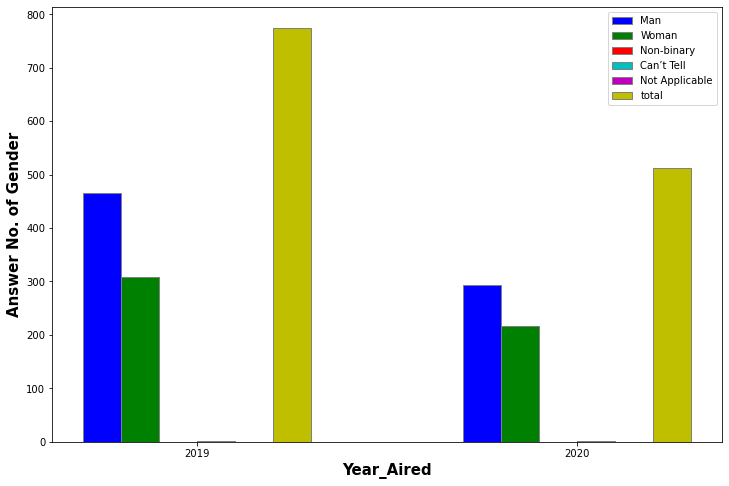

In [7]:
# plot
# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize =(12, 8))
colors = ['b','g','r','c','m','y', 'lime', 'navy', 'gold', 'orange', 'coral', 'brown']

# Set position of bar on X axis
br = []
br_tmp = np.arange(len(sex_total[0]))
br.append(br_tmp)

for i in range(1, len(sex_total)):
    br_tmp = [x + barWidth for x in br[i-1]]
    br.append(br_tmp)

# Make the plot
for i in range(len(br)):
    plt.bar(br[i], sex_total[i], color =colors[i], width = barWidth, edgecolor ='grey', label = str(uniq_sex_desc[i]))

# Adding Xticks
plt.xlabel('Year_Aired', fontweight ='bold', fontsize = 15)
plt.ylabel('Answer No. of Gender', fontweight ='bold', fontsize = 15)
plt.xticks([r + 2.5 * barWidth for r in range(len(br[0]))],
        ['2019', '2020'])

plt.legend()
plt.show()

### Conclusion

From the bar chart of the distribution of Gender answers, we can find that the distribution of two different years are almost the same; both of them have more answers of option 2 -- which is 'male'. But comparing to 2019, the total number of answers in 2020 decreased.

## Race

In [8]:
# uniq_race = np.sort(df['Q7_Race_Ethnicity'].unique()).tolist()
# uniq_race = [i for i in range(1, 12)]
uniq_race = [1,2,3,4,5,6,7,8,888,999]
uniq_race_desc = ['White',
             'Black',
             'Asian/Pacific Islander',
             'Latinx', 
             'Native', 
             'Middle Eastern/North African',
             'Multi-racial (only if you know for certain)',
             'Non-white, but cannot tell specific race', 
             'Can’t tell', 
             'NA',
             'Total'
]
# to get age distribution of Year_Aired = 2020
race_total = [[0, 0] for _ in range(len(uniq_race) + 1)]
# race_total[i][0] means the value counts of i-th answer of Q7_Race_Ethnicity in Year_Aired = 2019
# race_total[i][1] means the value counts of i-th answer of Q7_Race_Ethnicity in Year_Aired = 2020
# race_total[-1][0/1] means the total value counts of Q7_Race_Ethnicity in Year_Aired = 2019/2020

year_2020_counts = df[df['Year_Aired'] == 2020]['Race'].value_counts()
year_2019_counts = df[df['Year_Aired'] == 2019]['Race'].value_counts()
sum_of_2019 = 0
sum_of_2020 = 0
for i in range(len(race_total) - 1):
    race_idx = uniq_race[i]
    if race_idx in year_2020_counts.index:
        race_total[i][1] = year_2020_counts[race_idx]
        sum_of_2020 += race_total[i][1]
    else:
        race_total[i][1] = 0
        
    if race_idx in year_2019_counts.index:
        race_total[i][0] = year_2019_counts[race_idx]
        sum_of_2019 += race_total[i][0]
    else:
        race_total[i][0] = 0
uniq_race.append('total')
race_total[-1][0] = sum_of_2019
race_total[-1][1] = sum_of_2020
# race_total

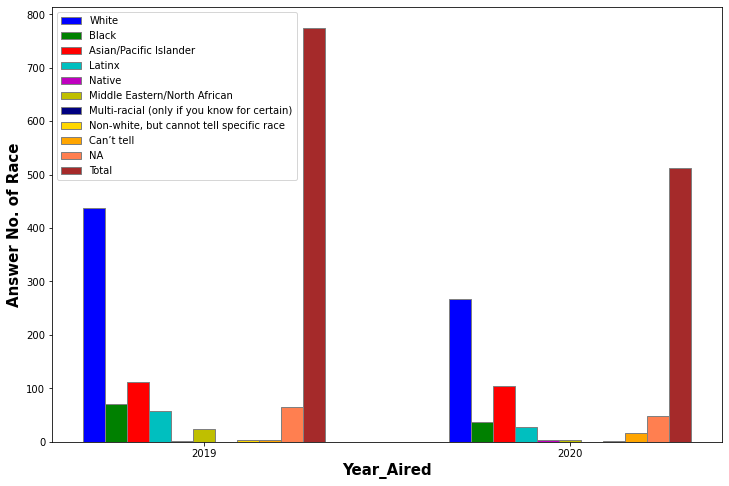

In [9]:
# plot
# set width of bar
barWidth = 0.06
fig = plt.subplots(figsize =(12, 8))
colors = ['b','g','r','c','m','y', 'navy', 'gold', 'orange', 'coral', 'brown']

# Set position of bar on X axis
br = []
br_tmp = np.arange(len(race_total[0]))
br.append(br_tmp)

for i in range(1, len(race_total)):
    br_tmp = [x + barWidth for x in br[i-1]]
    br.append(br_tmp)

# Make the plot
for i in range(len(br)):
    plt.bar(br[i], race_total[i], color =colors[i], width = barWidth, edgecolor ='grey', label = str(uniq_race_desc[i]))

# Adding Xticks
plt.xlabel('Year_Aired', fontweight ='bold', fontsize = 15)
plt.ylabel('Answer No. of Race', fontweight ='bold', fontsize = 15)
plt.xticks([r + 5 * barWidth for r in range(len(br[0]))],
        ['2019', '2020'])

plt.legend()
plt.show()

### Conclusion

From the bar chart above, we can see that the distributions of answers between two years do not change much. White people (Option 1) are the majority of the answer set. But comparing to 2019, the total number of answers in 2020 decreased.